In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from datetime import date, timedelta

# Library untuk ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Buat file path dari database yang akan digunakan
dbfile = "olist.db"

# Membuat koneksi SQL ke SQLite database
conn = sqlite3.connect(dbfile)

# Membuat cursor
curr = conn.cursor()

# Tabel dalam database
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table';", conn)

In [3]:
df

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [4]:
# Konversi table yang ada dalam database menjadi pandas dataframe
df_order_customer = pd.read_sql("SELECT * FROM olist_order_customer_dataset", conn)
df_order = pd.read_sql("SELECT * FROM olist_order_dataset", conn)
df_order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", conn)
df_order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", conn)
df_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", conn)
df_products = pd.read_sql("SELECT * FROM olist_products_dataset", conn)
df_seller = pd.read_sql("SELECT * FROM olist_sellers_dataset", conn)
df_geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", conn)
df_name_translation = pd.read_sql("SELECT * FROM product_category_name_translation", conn)

In [5]:
df_order_customer

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
df_name_translation

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [7]:
df_products

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
# Lakukan join sesuai gambar relasi
join_df = df_products.merge(df_name_translation, on="product_category_name", how="inner")
join_df = join_df.merge(df_order_items, on="product_id", how="outer")
join_df = join_df.merge(df_order, on="order_id", how="outer")
join_df = join_df.merge(df_order_reviews, on="order_id", how="outer")

In [9]:
# Mengambil kolom untuk yang akan digunakan untuk analisis
df_new = join_df[["product_id",
                 "order_id",
                 "order_purchase_timestamp",
                 "product_category_name_english",
                 "price",
                 "review_score"]].copy()
df_new.head()

,product_id,order_id,order_purchase_timestamp,product_category_name_english,price,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,2018-04-24 16:16:53,perfumery,10.91,5.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,2017-11-16 21:28:00,perfumery,16.90,5.0
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,2017-11-30 01:51:23,perfumery,16.90,2.0
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,2017-07-28 09:34:29,perfumery,339.00,5.0
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,2018-05-17 09:24:18,perfumery,275.00,3.0


In [10]:
# cek missing value
df_new.isna().sum()

product_id                        778
order_id                            0
order_purchase_timestamp            0
product_category_name_english    2414
price                             778
review_score                      961
dtype: int64

In [11]:
# Hapus missing value
data_clean = df_new.dropna()

# Cek ulang
check_na = data_clean.isna().sum()
check_na

product_id                       0
order_id                         0
order_purchase_timestamp         0
product_category_name_english    0
price                            0
review_score                     0
dtype: int64

In [12]:
# cek duplikat pada kolom order_id
dup_order_id = df_new.duplicated(subset=["order_id"]).sum()
dup_order_id

14651

In [13]:
df_clean = df_new.drop_duplicates(subset=["order_id"])
dup_order_id = df_clean.duplicated(subset=["order_id"]).sum()
dup_order_id

0

In [14]:
df_clean.shape

(99441, 6)

In [15]:
df_clean["order_purchase_timestamp"] = pd.to_datetime(df_clean["order_purchase_timestamp"])
df_clean["day"] = df_clean["order_purchase_timestamp"].dt.day
df_clean["month"] = df_clean["order_purchase_timestamp"].dt.month
df_clean["year"] = df_clean["order_purchase_timestamp"].dt.year

In [16]:
print(min(df_clean["order_purchase_timestamp"]))
print(max(df_clean["order_purchase_timestamp"]))
df_clean = df_clean.drop(columns = ["order_purchase_timestamp"])

2016-09-04 21:15:19
2018-10-17 17:30:18


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 114091
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     98666 non-null  object 
 1   order_id                       99441 non-null  object 
 2   product_category_name_english  97256 non-null  object 
 3   price                          98666 non-null  float64
 4   review_score                   98673 non-null  float64
 5   day                            99441 non-null  int64  
 6   month                          99441 non-null  int64  
 7   year                           99441 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.8+ MB


In [18]:
# Mengetahui 10 produk apa yang paling banyak dibeli
df_1 = df_clean.rename({"product_category_name_english":"product_category",
                       "order_id":"order_counts"}, axis=1)
df_1 = df_1[["product_category","order_counts"]].groupby("product_category").count()
df_1 = df_1.sort_values("order_counts", ascending=False).head(10)
df_1 = df_1.reset_index()

df_1

,product_category,order_counts
0,bed_bath_table,9298
1,health_beauty,8791
2,sports_leisure,7717
3,computers_accessories,6674
4,furniture_decor,6398
5,housewares,5867
6,watches_gifts,5592
7,telephony,4177
8,auto,3874
9,toys,3853


<function matplotlib.pyplot.show(close=None, block=None)>

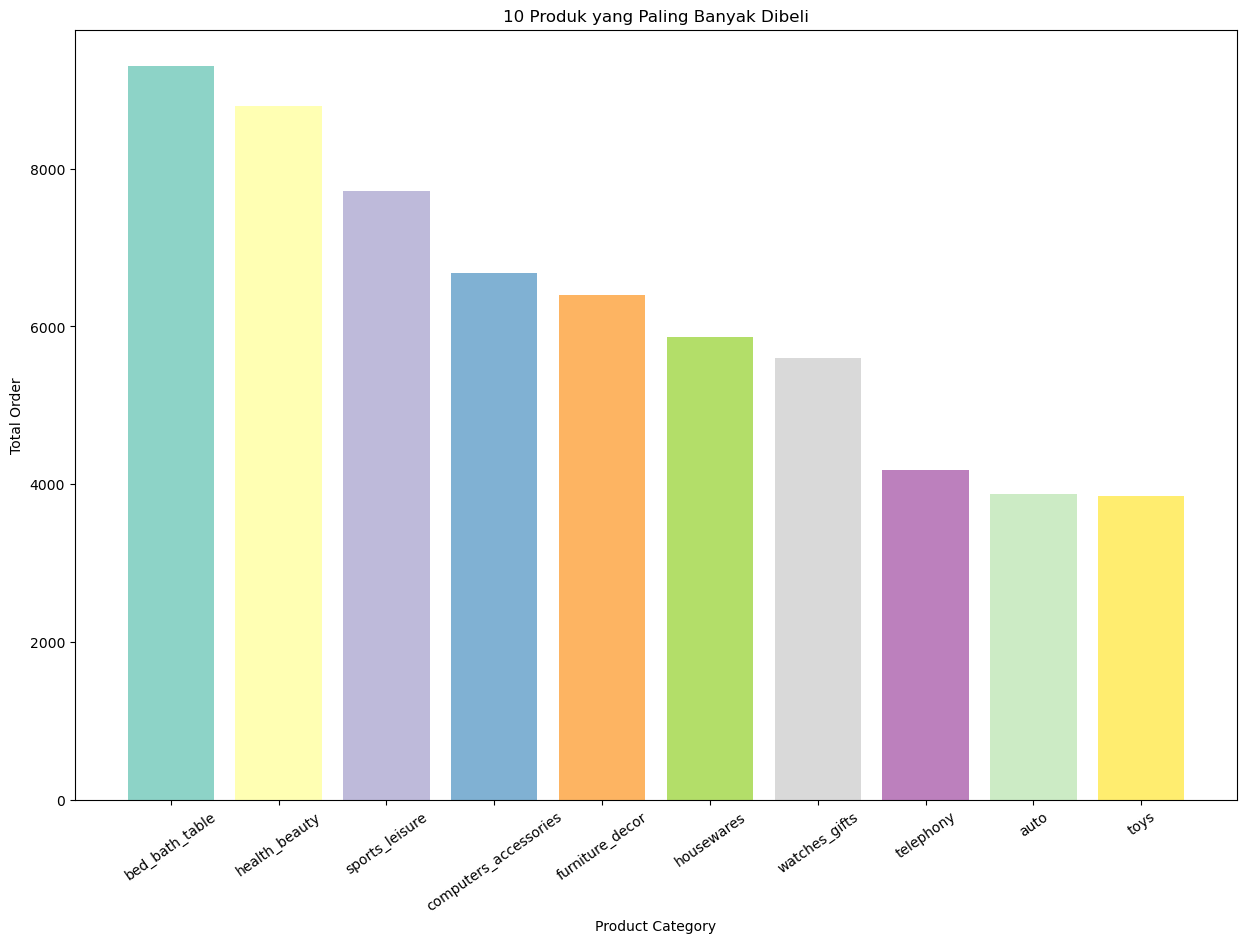

In [19]:
# Membuat visualisasi df_1
plt.figure(figsize = (15, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(df_1)))

plt.bar(df_1["product_category"], df_1["order_counts"], color=colors)
plt.xlabel("Product Category")
plt.xticks(rotation = 35)
plt.ylabel("Total Order")
plt.title("10 Produk yang Paling Banyak Dibeli")
plt.show

In [20]:
# Mengetahui 10 produk yang paling banyak menghasilkan penjualan
df_2 = df_clean.rename({"product_category_name_english":"product_category",
                       "price":"sales"}, axis=1)
df_2 = df_2[["product_category","sales"]].groupby("product_category").sum()
df_2 = df_2.sort_values("sales", ascending=False).head(10)
df_2 = df_2.reset_index()

df_2

,product_category,sales
0,health_beauty,1189984.42
1,watches_gifts,1166757.00
2,sports_leisure,916680.40
3,bed_bath_table,893464.15
4,computers_accessories,778504.83
5,cool_stuff,617234.76
6,furniture_decor,605783.34
7,housewares,563460.73
8,auto,549547.97
9,toys,465316.51


<function matplotlib.pyplot.show(close=None, block=None)>

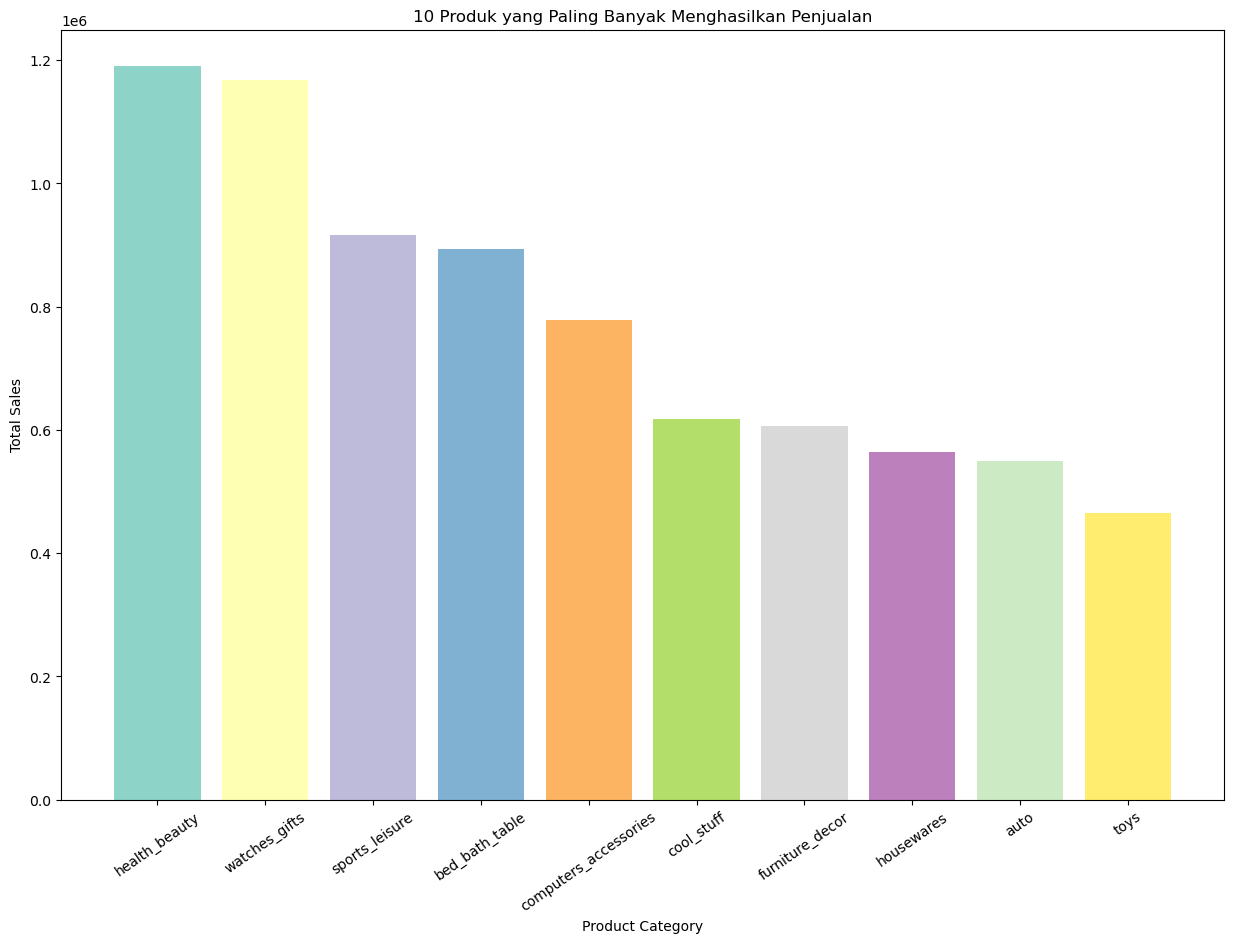

In [21]:
# Membuat visualisasi df_2
plt.figure(figsize = (15, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(df_2)))

plt.bar(df_2["product_category"], df_2["sales"], color=colors)
plt.xlabel("Product Category")
plt.xticks(rotation = 35)
plt.ylabel("Total Sales")
plt.title("10 Produk yang Paling Banyak Menghasilkan Penjualan")
plt.show

In [22]:
# Mengetahui 10 Product yang mendapatkan paling banyak review baik
df_3 = df_clean.rename({"product_category_name_english":"product_category",
                       "review_score":"review_score"}, axis=1)
df_3 = df_3[["product_category","review_score"]].groupby("product_category").mean()
df_3 = df_3.sort_values("review_score", ascending=False).head(10)
df_3 = df_3.reset_index()

df_3

,product_category,review_score
0,cds_dvds_musicals,4.666667
1,la_cuisine,4.545455
2,flowers,4.538462
3,books_general_interest,4.467327
4,costruction_tools_tools,4.425532
5,books_technical,4.407843
6,fashion_sport,4.400000
7,music,4.388889
8,food_drink,4.382883
9,cine_photo,4.333333


<function matplotlib.pyplot.show(close=None, block=None)>

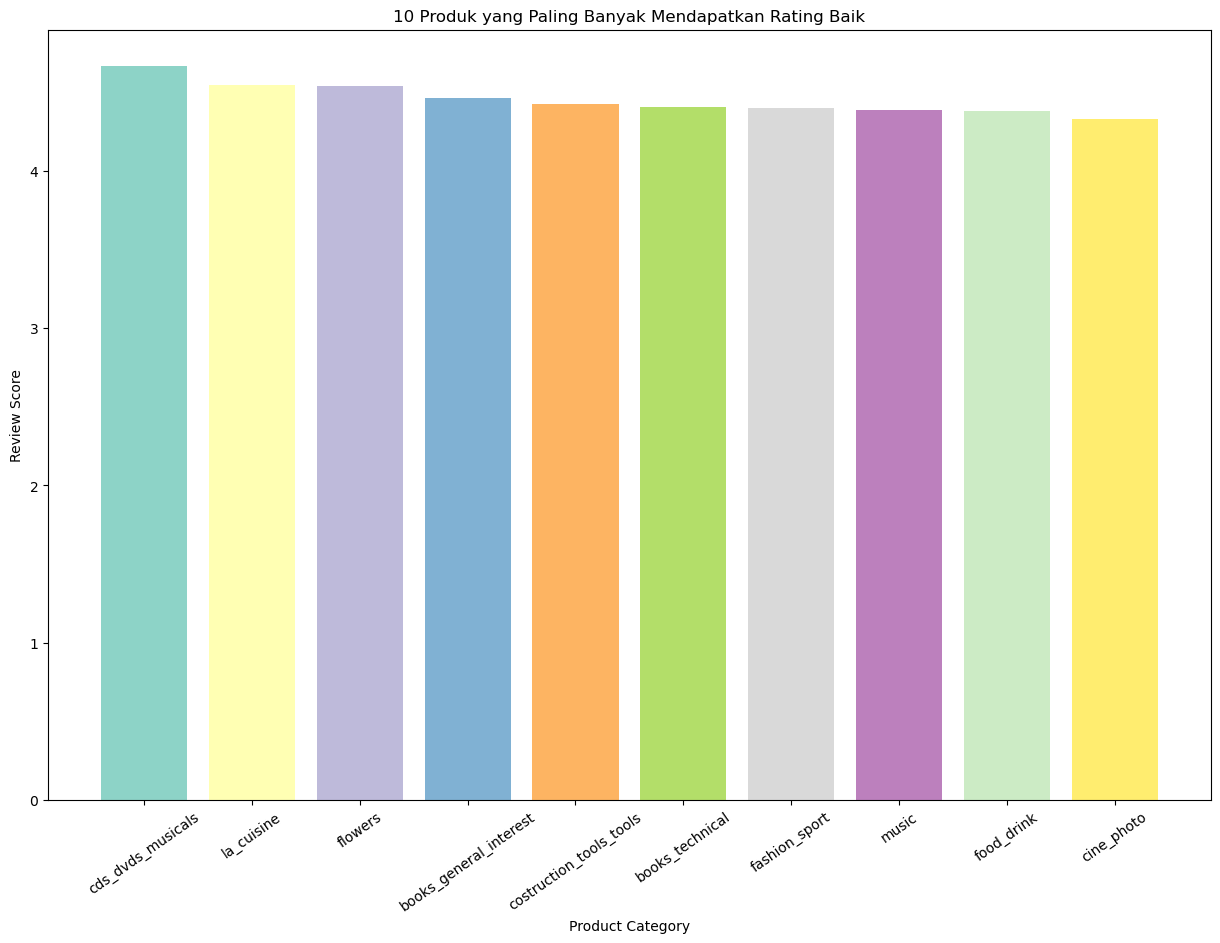

In [23]:
# Membuat visualisasi df_3
plt.figure(figsize = (15, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(df_3)))

plt.bar(df_3["product_category"], df_3["review_score"], color=colors)
plt.xlabel("Product Category")
plt.xticks(rotation = 35)
plt.ylabel("Review Score")
plt.title("10 Produk yang Paling Banyak Mendapatkan Rating Baik")
plt.show

In [24]:
# Informasi pertumbuhan pemesanan produk dari 10 produk yang paling diminati
df_4 = df_clean[['product_category_name_english','order_id']]
df_4 = df_4.groupby(['product_category_name_english']).count()
df_4 = df_4.sort_values(by = ['order_id'], ascending = False).head(10)

df_4

,order_id
product_category_name_english,
bed_bath_table,9298
health_beauty,8791
sports_leisure,7717
computers_accessories,6674
furniture_decor,6398
housewares,5867
watches_gifts,5592
telephony,4177
auto,3874


In [25]:
product_grow = df_clean.query("product_category_name_english in @df_4.index")

product_grow

,product_id,order_id,product_category_name_english,price,review_score,day,month,year
3683,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,sports_leisure,79.80,5.0,9,7,2018
3684,3bb7f144022e6732727d8d838a7b13b3,7f6209da874fb56bf2fd26791d83bcb8,sports_leisure,26.70,5.0,4,6,2017
3685,051b9ff13dd55c0a6655a15ff296f80d,ad979a858d9d6a2b8bbec764d452d1a9,sports_leisure,285.00,5.0,2,8,2018
3686,ce5b91848b91118daffb3af53b747475,2bfb6645f99e561b82bbdd84c98da7e1,sports_leisure,19.90,5.0,11,5,2018
3687,5eaa343860dc445b3fd43d1b682809fd,77338308426749365f169773fa614a56,sports_leisure,1090.00,5.0,15,8,2018
...,...,...,...,...,...,...,...,...
99983,3e6d2bde9274ac275013aa90d7e2bf16,36d41a5b60875876ac9f3dea8d233a1f,watches_gifts,99.99,5.0,27,11,2017
99984,3e6d2bde9274ac275013aa90d7e2bf16,769d812b1dd036eb0a69578537ff5320,watches_gifts,84.90,5.0,23,3,2018
99985,3e6d2bde9274ac275013aa90d7e2bf16,9c9b9122cad8803b5a5373345e256d99,watches_gifts,84.90,5.0,2,4,2018
99986,3e6d2bde9274ac275013aa90d7e2bf16,afc72297ba4fcad6dd5bbd73e9cfa715,watches_gifts,99.99,5.0,24,2,2018


In [26]:
grow_order = pd.DataFrame(data = product_grow.groupby(['month', 'product_category_name_english'])['order_id'].count())
grow_order = grow_order.sort_values(by = ['order_id'], ascending = False)

grow_order.head(10)

order_id
month product_category_name_english          
8     health_beauty                      1116
6     health_beauty                      1030
7     bed_bath_table                     1016
8     bed_bath_table                      990
7     health_beauty                       985
6     bed_bath_table                      980
5     health_beauty                       948
      bed_bath_table                      926
3     bed_bath_table                      911
2     computers_accessories               898

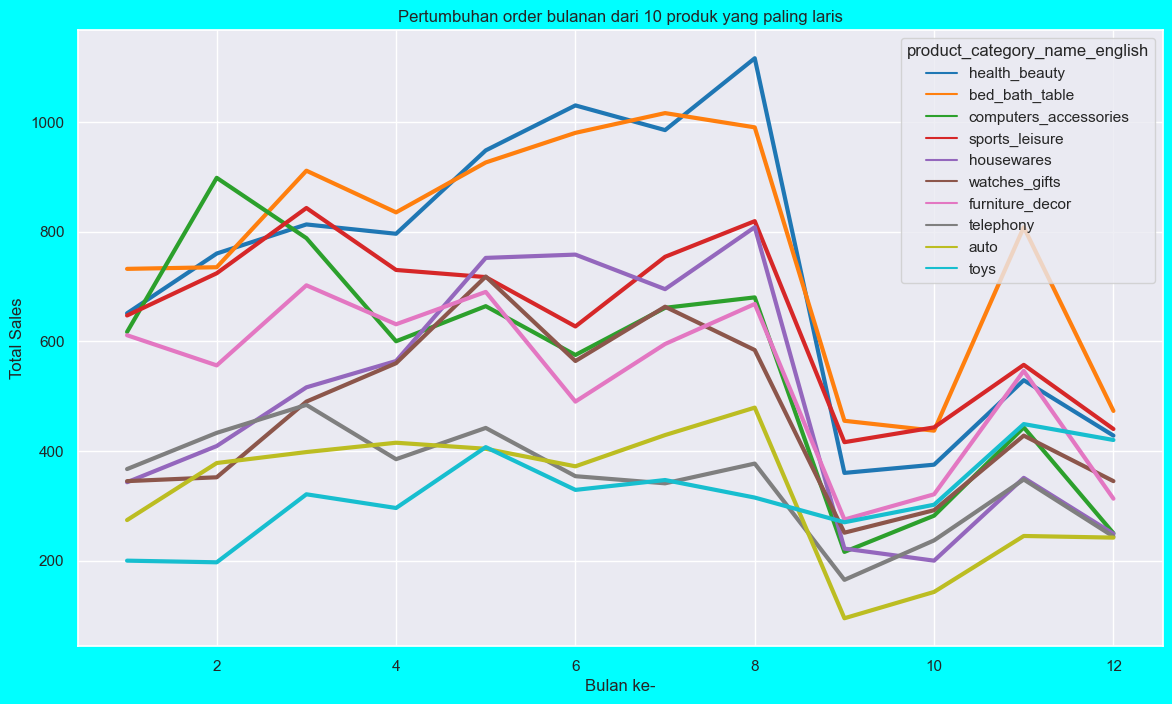

In [27]:
sns.set(rc={"figure.figsize":(14,8)})

# Mengubah latar belakang plot menjadi hitam
fig = plt.figure(facecolor = "cyan")

custom_palette = sns.color_palette("tab10")

ax = sns.lineplot(data = grow_order, x="month", y="order_id",
                 hue="product_category_name_english", palette=custom_palette,
                 legend="full", lw=3)

plt.title("Pertumbuhan order bulanan dari 10 produk yang paling laris")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()